# Titanic: Machine Learning from Disaster

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import  GridSearchCV, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.tree import DecisionTreeClassifier
import time as time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

random_state = 42

In [70]:
# Read in the input training dataset
df = pd.read_csv("train.csv")

# Read in the input testing dataset
df_test = pd.read_csv("test.csv")

#Visualize the training data 
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
df.describe(include='all')
# Missing Values are present in Age, Cabin and Embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [72]:
df_test.describe(include='all')
# Missing Values are present in Age ,Cabin and Fare

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Rosenbaum, Miss. Edith Louise",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [73]:
#df = df.fillna(value={'Age' :0})

#Fill missing Values in Age and Fare with Median for training and test set
df['Age'].fillna(df['Age'].dropna().median(), inplace = True)
df['Fare'].fillna(df['Fare'].median(), inplace = True)

df_test['Age'].fillna(df_test['Age'].dropna().median(),inplace = True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace = True)

#Fill missing Values in Embarked with 'Mode' ( Value appearing most often) for training and test set
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#Drop Cabin as it has lot of missing values

df.drop(['Cabin'],axis=1,inplace=True)
df_test.drop(['Cabin'],axis=1,inplace=True)

df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


In [74]:
#Lets Extract the Title from the Names and add it as a feature and drop Name as it is unique
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [75]:

df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
df_test['Title'] = df_test['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
threshold = 10
df.Title.value_counts()
# Lets convert the title with less count than 10 to generic one Misc


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Jonkheer          1
Don               1
Ms                1
Mme               1
Capt              1
the Countess      1
Sir               1
Name: Title, dtype: int64

In [76]:
# Apply Misc title on Training set based on threshold
misc_names = df.Title.value_counts() < threshold

df['Title'] = df.Title.map(lambda x: 'Misc' if misc_names.loc[x] == True else x)

df.Title.value_counts()

#df['FamilySize'] = df ['SibSp'] + df['Parch'] + 1

#df['IsAlone'] = 1 #initialize to yes/1 is alone
#df['IsAlone'].loc[df['FamilySize'] > 1] = 0

df['FareBin'] = pd.qcut(df['Fare'], 4)

#df['AgeBin'] = pd.cut(df['Age'].astype(int), 5)

df_test['FareBin'] = pd.qcut(df_test['Fare'], 4)

df.drop(['Fare'],axis=1,inplace=True)
df_test.drop(['Fare'],axis=1,inplace=True)

#df_test['AgeBin'] = pd.cut(df['Age'].astype(int), 5)
df['FareBin'] = df['FareBin'].cat.codes
df_test['FareBin'] = df_test['FareBin'].cat.codes


In [77]:
df.FareBin.value_counts()

1    224
0    223
3    222
2    222
Name: FareBin, dtype: int64

In [78]:
# Apply Misc title on Training set based on threshold
misc_names = df_test.Title.value_counts() < threshold

df_test['Title'] = df_test.Title.map(lambda x: 'Misc' if misc_names.loc[x] == True else x)

df_test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Misc        7
Name: Title, dtype: int64

In [79]:
# We dont need passenger id and name as it is unique
df.drop(['PassengerId','Name'],axis=1,inplace=True)
passenger = df_test['PassengerId']
df_test.drop(['PassengerId','Name'],axis=1,inplace=True)

In [80]:
#Lets look at the features in training set now!

pd.crosstab(df['Survived'],df['FareBin'])


FareBin,0,1,2,3
Survived,,,,
0,179,156,121,93
1,44,68,101,129


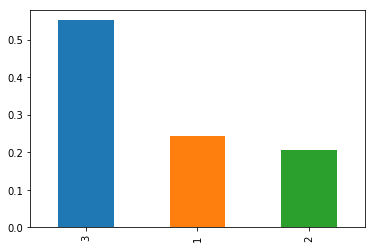

In [81]:
# Total Count of each category in 'PClass' categorical column
df['Pclass'].value_counts(normalize=True).plot(kind='bar')


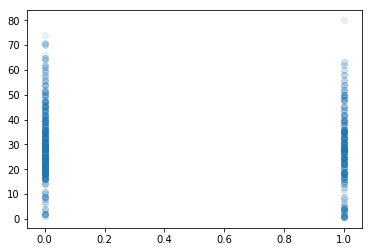

In [82]:
plt.scatter(df.Survived,df.Age, alpha=0.1)

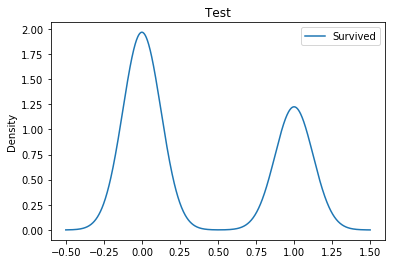

In [83]:
# Based on the below Kernel Density estimation, more people died which is already known.
df.Survived.plot(kind='kde',title="Test",legend=True)

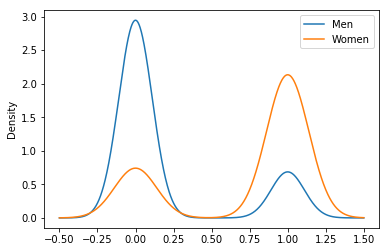

In [84]:
# KDE for gender and survived
# More Men died compared to women

df.Survived[df.Sex == 'male'].plot(kind='kde')
df.Survived[df.Sex == 'female'].plot(kind='kde')
plt.legend(["Men","Women"])     
    


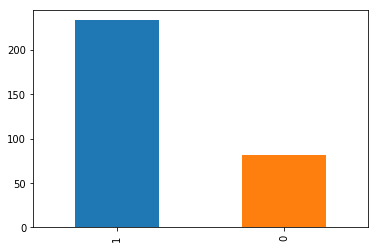

In [85]:
# Survived vs Gender -> More women survived
df.Survived[df.Sex == 'female'].value_counts().plot(kind='bar')

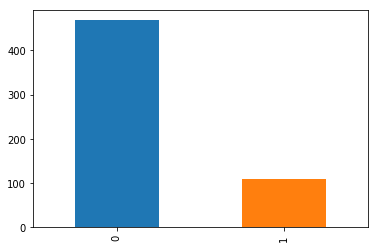

In [86]:
# More men died
df.Survived[df.Sex == 'male'].value_counts().plot(kind='bar')

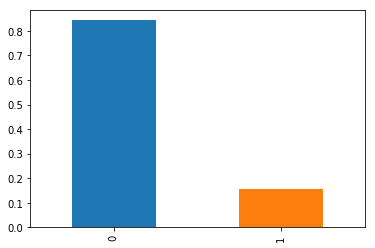

In [87]:
#More men in lower classes died
df.Survived[ (df.Sex == 'male') & ( df.Pclass == 2 ) ].value_counts(normalize=True).plot(kind='bar')

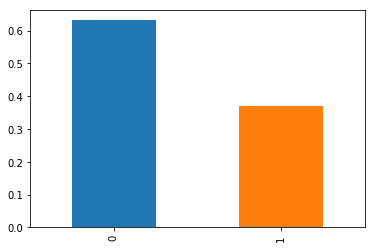

In [88]:
# Men in highest Pclass survived more compared to lower classes
df.Survived[ (df.Sex == 'male') & ( df.Pclass == 1 ) ].value_counts(normalize=True).plot(kind='bar')

In [89]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked,Title,FareBin
0,0,3,male,22.0,1,0,A/5 21171,S,Mr,0
1,1,1,female,38.0,1,0,PC 17599,C,Mrs,3
2,1,3,female,26.0,0,0,STON/O2. 3101282,S,Miss,1
3,1,1,female,35.0,1,0,113803,S,Mrs,3
4,0,3,male,35.0,0,0,373450,S,Mr,1


In [90]:
# Ticket as a feature can be dropped
df['Ticket'].value_counts()

CA. 2343             7
347082               7
1601                 7
347088               6
CA 2144              6
3101295              6
382652               5
S.O.C. 14879         5
PC 17757             4
4133                 4
LINE                 4
349909               4
347077               4
W./C. 6608           4
113760               4
2666                 4
113781               4
19950                4
17421                4
347742               3
239853               3
110152               3
24160                3
13502                3
PC 17572             3
C.A. 34651           3
248727               3
35273                3
F.C.C. 13529         3
PC 17755             3
                    ..
330877               1
315094               1
236852               1
4137                 1
4136                 1
226593               1
4134                 1
374746               1
110813               1
C.A. 6212            1
349219               1
34218                1
343120     

In [91]:
# Lets drop Ticket and Survived from training set
#Capture the Survived column before dropping to form Labels

Y1 = df['Survived']
df.drop(['Ticket','Survived'],axis=1,inplace=True)

df_test.drop(['Ticket'],axis=1,inplace=True)

#Lets see how our training set looks now!
df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FareBin
0,3,male,22.0,1,0,S,Mr,0
1,1,female,38.0,1,0,C,Mrs,3
2,3,female,26.0,0,0,S,Miss,1
3,1,female,35.0,1,0,S,Mrs,3
4,3,male,35.0,0,0,S,Mr,1


In [92]:
# Lets see how our testing set looks now!
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FareBin
0,3,male,34.5,0,0,Q,Mr,0
1,3,female,47.0,1,0,S,Mrs,0
2,2,male,62.0,0,0,Q,Mr,1
3,3,male,27.0,0,0,S,Mr,1
4,3,female,22.0,1,1,S,Mrs,1


In [93]:
# Lets transform the categorical variables to numerical 

#Transform Train set
le = LabelEncoder()
df_cat = df.select_dtypes(include=[object])
df_cat = df_cat.apply(le.fit_transform)

df['Sex'] = df_cat['Sex'] 
df['Embarked'] = df_cat['Embarked'] 
df['Title'] = df_cat['Title'] 

#Transform Test set
le = LabelEncoder()
df_cat = df_test.select_dtypes(include=[object])
df_cat = df_cat.apply(le.fit_transform)

df_test['Sex'] = df_cat['Sex'] 
df_test['Embarked'] = df_cat['Embarked'] 
df_test['Title'] = df_cat['Title'] 

# Lets split the training set into train and validation set

X_train, X_test, y_train, y_test = train_test_split(df, Y1, test_size=0.33, random_state=42)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FareBin
6,1,1,54.0,0,0,2,3,3
718,3,1,28.0,0,0,1,3,2
685,2,1,25.0,1,2,0,3,3
73,3,1,26.0,1,0,0,3,1
882,3,0,22.0,0,0,2,2,1


In [94]:
# All the data in the training set are numerical
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 6 to 102
Data columns (total 8 columns):
Pclass      596 non-null int64
Sex         596 non-null int32
Age         596 non-null float64
SibSp       596 non-null int64
Parch       596 non-null int64
Embarked    596 non-null int32
Title       596 non-null int32
FareBin     596 non-null int8
dtypes: float64(1), int32(3), int64(3), int8(1)
memory usage: 30.8 KB


In [95]:
# Before we start with modeling our data, lets create a dict for storing the accuracy of our models

Accuracy_models = {}

In [96]:
#Lets try to model the data using Support Vector Machine

sc = StandardScaler()

X_scaled = sc.fit(X_train)
X_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)
model_svc = SVC(gamma='auto',random_state=42)

model_svc.fit(X_scaled,y_train)

y_svc_pred = model_svc.predict(X_test_scaled)

y_svc_train_pred = model_svc.predict(X_scaled)


# XXX
# TODO: Test its accuracy on the training set using the accuracy_score method.
print("SVC Train Accuracy: %.2f"
      % accuracy_score(y_train, y_svc_train_pred.round()))
# TODO: Test its accuracy on the test set using the accuracy_score method.
print("SVC Test Accuracy: %.2f"
      % accuracy_score(y_test, y_svc_pred.round()))

Accuracy_models['SVC Before Tuning'] = accuracy_score(y_test, y_svc_pred.round())

SVC Train Accuracy: 0.85
SVC Test Accuracy: 0.83


c:\python27\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int8, int32, int64, float64 were all converted to float64 by StandardScaler.
  
c:\python27\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int8, int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [97]:
# # XXX
# # Lets Tune the hyper-parameters 'C' and 'kernel' of Support Vector Machine (using rbf and linear).

param_grid = {"C":[0.1,1,10],"kernel":['linear','rbf']}

grid_search = GridSearchCV(SVC(random_state=42),param_grid=param_grid,cv=10)
tick = time.time()
grid_search.fit(X_scaled,y_train)
tock = time.time() - tick
#print("SVC Best Hyperparameters",grid_search.best_params_)
#print("SVC Cross Validation Results", grid_search.cv_results_)
#print ("Time taken for SVC CV", tock)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
C_value = best_params['C']
kernel = best_params['kernel']


model_svc = SVC(kernel=kernel,C=C_value,random_state=42)

model_svc.fit(X_scaled,y_train)

y_svc_pred = model_svc.predict(X_test_scaled)

y_svc_train_pred = model_svc.predict(X_scaled)


print("SVC Train Accuracy After CV: %.2f"
      % accuracy_score(y_train, y_svc_train_pred.round()))

print("SVC Test Accuracy After CV: %.2f"
      % accuracy_score(y_test, y_svc_pred.round()))

#Print the best params, using .best_params_, and print the best score, using .best_score_.

print ('Best SVM Hyperparameter Params', best_params)
print ('Best SVM Hyperparameter Score', best_score)
# # XXX

Accuracy_models['SVC After Tuning'] = accuracy_score(y_test, y_svc_pred.round())

SVC Train Accuracy After CV: 0.85
SVC Test Accuracy After CV: 0.83
('Best SVM Hyperparameter Params', {'kernel': 'rbf', 'C': 1})
('Best SVM Hyperparameter Score', 0.8271812080536913)


In [98]:
# XXX
# Lets Try ExtraTreesClassifier 
# XXX
features = X_train.shape[1]

forest = ExtraTreesClassifier(n_estimators=10,
                              max_features=0.3,
                              n_jobs=-1,
                              random_state=random_state)

forest.fit(X_train,y_train)

rfc_y_train_pred = forest.predict(X_train)
rfc_y_pred = forest.predict(X_test)

# XXX
# TODO: Test its accuracy on the training set using the accuracy_score method.
print("Extra Trees Forest Train Accuracy: %.2f"
      % accuracy_score(y_train, rfc_y_train_pred.round()))
# TODO: Test its accuracy on the test set using the accuracy_score method.
print("Extra Trees Forest Test Accuracy: %.2f"
      % accuracy_score(y_test, rfc_y_pred.round()))
# XXX

Accuracy_models['ExtraTrees Before Tuning'] = accuracy_score(y_test, rfc_y_pred.round())

# XXX
#  Tune the hyper-parameters 'n_estimators' and 'max_depth'.
#   Print the best params, using .best_params_, and print the best score, using .best_score_.

param_grid = {"n_estimators":[10,20,40,50,60,70,80,90,100],
              "max_depth" : [2,4,6,8,10,12,15], "max_features" : [1,0.3,0.5]}
grid_search = GridSearchCV(ExtraTreesClassifier(random_state=random_state,n_jobs=-1),param_grid=param_grid,cv=10,n_jobs=-1)
tick = time.time()
grid_search.fit(X_train,y_train)
tock = time.time() - tick
print("Extra Trees Best Hyperparameters",grid_search.best_params_)
print("Extra Trees Best Score",grid_search.best_score_)
#print("Random Forest Cross Validation Results", grid_search.cv_results_)
#print ("Time Taken for Random FOrest CV",tock)

best_params = grid_search.best_params_
estimators = best_params['n_estimators']
max_features = best_params['max_features']
max_depth = best_params['max_depth']

forest = ExtraTreesClassifier(n_estimators=estimators,
                              max_features=max_features,max_depth=max_depth,
                              n_jobs=-1,
                              random_state=random_state)


forest.fit(X_train,y_train)

y_train_cv_pred = forest.predict(X_train)
y_pred_cv = forest.predict(X_test)

print("Extra Trees Forest Train Accuracy after CV: %.2f"
      % accuracy_score(y_train, y_train_cv_pred.round()))
# TODO: Test its accuracy on the test set using the accuracy_score method.
print("Extra Trees Forest Test Accuracy after CV: %.2f"
      % accuracy_score(y_test, y_pred_cv.round()))

Accuracy_models['ExtraTrees After Tuning'] = accuracy_score(y_test, y_pred_cv.round())

Extra Trees Forest Train Accuracy: 0.96
Extra Trees Forest Test Accuracy: 0.80


c:\python27\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


('Extra Trees Best Hyperparameters', {'max_features': 1, 'n_estimators': 70, 'max_depth': 6})
('Extra Trees Best Score', 0.8288590604026845)
Extra Trees Forest Train Accuracy after CV: 0.86
Extra Trees Forest Test Accuracy after CV: 0.82


In [ ]:
# XXX
# Lets Try the wonderful RandomForestClassifier 
# XXX

rfc_model = RandomForestClassifier(n_estimators=100, max_depth=10,
                                  random_state=random_state)

rfc_model.fit(X_train,y_train)

rfc_y_train_pred = rfc_model.predict(X_train)
rfc_y_pred = rfc_model.predict(X_test)

# XXX
# TODO: Test its accuracy on the training set using the accuracy_score method.
print("Random Forest Train Accuracy: %.2f"
      % accuracy_score(y_train, rfc_y_train_pred.round()))
# TODO: Test its accuracy on the test set using the accuracy_score method.
print("Random Forest Test Accuracy: %.2f"
      % accuracy_score(y_test, rfc_y_pred.round()))
# XXX

Accuracy_models['RandomForest Before Tuning'] = accuracy_score(y_test, y_pred_cv.round())
# XXX
# Tune the hyper-parameters 'n_estimators' and 'max_depth'.

param_grid = {"n_estimators":[10,20,40,50,60,70,80,90,100],
"max_depth":[2,4,6,8,10,12,14,None]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=random_state,n_jobs=-1),param_grid=param_grid,cv=10)
tick = time.time()
grid_search.fit(X_train,y_train)
tock = time.time() - tick
print("Random Forest Best Hyperparameters",grid_search.best_params_)
print("Random Forest Best Score",grid_search.best_score_)
#print("Random Forest Cross Validation Results", grid_search.cv_results_)
#print ("Time Taken for Random FOrest CV",tock)
best_params = grid_search.best_params_
estimators = best_params['n_estimators']
depth = best_params['max_depth']


rfc_cv = RandomForestClassifier(n_estimators=estimators,max_depth=depth,random_state=random_state,
                               bootstrap=True,n_jobs=-1)

rfc_cv.fit(X_train,y_train)

y_train_cv_pred = rfc_cv.predict(X_train)
y_pred_cv = rfc_cv.predict(X_test)

print("Random Forest Train Accuracy after CV: %.2f"
      % accuracy_score(y_train, y_train_cv_pred.round()))
# TODO: Test its accuracy on the test set using the accuracy_score method.
print("Random Forest Test Accuracy after CV: %.2f"
      % accuracy_score(y_test, y_pred_cv.round()))

# XXX
Accuracy_models['RandomForest After Tuning'] = accuracy_score(y_test, y_pred_cv.round())

Random Forest Train Accuracy: 0.93
Random Forest Test Accuracy: 0.82


In [ ]:
# XXX
#  Create a Adaboost Classifier and train it.
# XXX
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         n_estimators=20)


adaboost.fit(X_train,y_train)

rfc_y_train_pred = adaboost.predict(X_train)
rfc_y_pred = adaboost.predict(X_test)

#XXX
#TODO: Test its accuracy on the training set using the accuracy_score method.
print("Adaboost Train Accuracy: %.2f"
      % accuracy_score(y_train, rfc_y_train_pred.round()))
# TODO: Test its accuracy on the test set using the accuracy_score method.
print("Adaboost Test Accuracy: %.2f"
      % accuracy_score(y_test, rfc_y_pred.round()))
#XXX
Accuracy_models['Adaboost Before Tuning'] = accuracy_score(y_test, rfc_y_pred.round())

#XXX
#TODO: Tune the hyper-parameters 'n_estimators' and 'max_depth'.
#      Print the best params, using .best_params_, and print the best score, using .best_score_.



param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter"  : ["best", "random"],
              "n_estimators": [1,2,5,10,20,30,40,50,60,70,80,90,100]}


DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc',cv=10)


grid_search.fit(X_train,y_train)
tock = time.time() - tick
print("Adaboost Best Hyperparameters",grid_search.best_params_)
print("Adaboost Best Score",grid_search.best_score_)

best_params = grid_search.best_params_
estimators = best_params['n_estimators']
split_criteria = best_params['base_estimator__criterion']
splitter = best_params['base_estimator__splitter']



DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",
                            criterion=split_criteria,splitter=splitter)

adaboost = AdaBoostClassifier(DTC,n_estimators=estimators)


adaboost.fit(X_train,y_train)

rfc_y_train_pred = adaboost.predict(X_train)
rfc_y_pred = adaboost.predict(X_test)


print("Adaboost Train Accuracy after CV: %.2f"
      % accuracy_score(y_train, rfc_y_train_pred.round()))
# TODO: Test its accuracy on the test set using the accuracy_score method.
print("Adaboost Test Accuracy after CV: %.2f"
      % accuracy_score(y_test, rfc_y_pred.round()))

# XXX
Accuracy_models['Adaboost After Tuning'] = accuracy_score(y_test, rfc_y_pred.round())

In [ ]:

# import seaborn as sns
# from sklearn.metrics import classification_report,confusion_matrix

# cm = confusion_matrix(y_test, y_pred)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))
# sns.heatmap(cm, center=True)

In [ ]:


# poly = PolynomialFeatures(degree=3)

# X_train = poly.fit_transform(X_train)
# X_test = poly.fit_transform(X_test)


clf = LogisticRegression(random_state=42, solver='lbfgs',multi_class='multinomial').fit(X_train,y_train)

y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)

print("Logistic Regression Train Accuracy : %.2f"
      % accuracy_score(y_train, y_train_pred.round()))
# TODO: Test its accuracy on the test set using the accuracy_score method.
print("Logistic Regression Test Accuracy : %.2f"
      % accuracy_score(y_test, y_pred.round()))

Accuracy_models['Logistic Regression Before Tuning'] = accuracy_score(y_test, y_pred.round())

# XXX

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
grid_search = GridSearchCV(cv=None,
             estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

grid_search.fit(X_train,y_train)
print("Logistic Regression Best Hyperparameters",grid_search.best_params_)
print("Logistic Regression Best Score",grid_search.best_score_)
#print("Random Forest Cross Validation Results", grid_search.cv_results_)
#print ("Time Taken for Random FOrest CV",tock)
best_params = grid_search.best_params_
best_C = best_params['C']
print(best_C)

clf = LogisticRegression(C=best_C,random_state=42, solver='lbfgs',multi_class='multinomial').fit(X_train,y_train)

y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)

print("Logistic Regression Train Accuracy after CV: %.2f"
      % accuracy_score(y_train, y_train_pred.round()))
# TODO: Test its accuracy on the test set using the accuracy_score method.
print("Logistic Regression Test Accuracy after CV: %.2f"
      % accuracy_score(y_test, y_pred.round()))
Accuracy_models['Logistic Regression After Tuning'] = accuracy_score(y_test, y_pred.round())

In [68]:
#Lets plot a bar chart of the models


 

plt.barh(range(len(Accuracy_models)), list(Accuracy_models), align='center')
plt.yticks(range(len(Accuracy_models)), list(Accuracy_models)
plt.xlabel('Accuracy')
plt.ylabel('Model')

SyntaxError: invalid syntax (<ipython-input-68-deb13cee38d1>, line 8)

In [38]:
#Predict the Survived column using Kaggle test set with the best model 
# and create the final output file for Kaggle Submission



output = rfc_cv.predict(df_test)

output = output.reshape(-1,1)

passenger = pd.DataFrame({'PassengerID': passenger,'Survived': output[:,0]},dtype='Int32')
passenger_final = passenger.set_index('PassengerID').copy()


passenger_final.to_csv('gender_submission.csv',sep=',')
         